In [1]:
import pandas as pd

In [13]:
import pandas as pd

pd.set_option('display.max_columns', None)   # muestra todas las columnas
pd.set_option('display.max_rows', 100)       # opcional: no intentes mostrar 1.000.000 de filas en pantalla
pd.set_option('display.expand_frame_repr', False)

df = pd.read_csv('ipumsi_2012.csv')          # lectura simple
print("Columnas leídas:", len(df.columns))
print(df.columns.tolist()[:50])              # muestra los primeros 50 nombres de columna



Columnas leídas: 108
['COUNTRY', 'YEAR', 'SAMPLE', 'SERIAL', 'HHWT', 'BO2012A_DWNUM', 'BO2012A_PERN', 'BO2012A_DWTYPE', 'BO2012A_OCCUP', 'BO2012A_WALL', 'BO2012A_WALLINT', 'BO2012A_ROOF', 'BO2012A_FLOOR', 'BO2012A_WATSRC', 'BO2012A_WATSUP', 'BO2012A_TOILET', 'BO2012A_SEWAGE', 'BO2012A_ELECTRIC', 'BO2012A_FUELCK', 'BO2012A_KITCHEN', 'BO2012A_ROOMS', 'BO2012A_BEDROOMS', 'BO2012A_TRASH', 'BO2012A_RADIO', 'BO2012A_TV', 'BO2012A_COMPUTR', 'BO2012A_INTERNET', 'BO2012A_PHONE', 'BO2012A_AUTO', 'BO2012A_BIKE', 'BO2012A_MOTORCYC', 'BO2012A_CART', 'BO2012A_BOAT', 'BO2012A_OWNERSHP', 'BO2012A_MIGRANTS', 'BO2012A_MIGN', 'BO2012A_DEATH', 'BO2012A_NDEATHS', 'BO2012A_DISAB', 'BO2012A_URBAN', 'BO2012A_WTHH', 'PERNUM', 'PERWT', 'BO2012A_PERNUM', 'BO2012A_RELATE', 'BO2012A_SEX', 'BO2012A_AGE', 'BO2012A_REGBTH', 'BO2012A_IDCARD', 'BO2012A_HTHPUB']


In [17]:
conteo_departamentos = dataframe['BO2012A_RESDEPT'].value_counts()

print(conteo_departamentos)

BO2012A_RESDEPT
2.0     270979
7.0     264525
3.0     175720
5.0      81916
1.0      57648
4.0      49021
6.0      48441
8.0      42117
9.0      10977
99.0      2171
98.0         1
Name: count, dtype: int64


In [20]:
pd.set_option('display.max_rows', None)   # mostrar todas las filas en la salida
pd.set_option('display.max_colwidth', None)

# Valores únicos (sin NaN)
uniques = dataframe['BO2012A_RESPROV'].dropna().unique()
print("Cantidad de valores únicos (no nulos):", len(uniques))
print(sorted(uniques))                    # lista ordenada de valores únicos

# O, si prefieres ver conteos y que no te los trunque:
conteo = dataframe['BO2012A_RESPROV'].value_counts(dropna=False)
print(conteo.to_string())                 # fuerza la impresión completa

Cantidad de valores únicos (no nulos): 123
[np.float64(101.0), np.float64(102.0), np.float64(103.0), np.float64(104.0), np.float64(105.0), np.float64(106.0), np.float64(107.0), np.float64(108.0), np.float64(109.0), np.float64(110.0), np.float64(199.0), np.float64(201.0), np.float64(202.0), np.float64(203.0), np.float64(204.0), np.float64(205.0), np.float64(206.0), np.float64(207.0), np.float64(208.0), np.float64(209.0), np.float64(210.0), np.float64(211.0), np.float64(212.0), np.float64(213.0), np.float64(214.0), np.float64(215.0), np.float64(216.0), np.float64(217.0), np.float64(218.0), np.float64(219.0), np.float64(220.0), np.float64(299.0), np.float64(301.0), np.float64(302.0), np.float64(303.0), np.float64(304.0), np.float64(305.0), np.float64(306.0), np.float64(307.0), np.float64(308.0), np.float64(309.0), np.float64(310.0), np.float64(311.0), np.float64(312.0), np.float64(313.0), np.float64(314.0), np.float64(315.0), np.float64(316.0), np.float64(399.0), np.float64(401.0), np.flo

In [23]:
conteo_personas = dataframe['BO2012A_PERNUM'].value_counts()

print(conteo_personas)

BO2012A_PERNUM
1.0     292117
2.0     224729
3.0     174084
4.0     125625
5.0      80713
6.0      48469
7.0      28132
8.0      16008
9.0       5022
10.0      3066
11.0      1823
12.0      1139
13.0       719
14.0       496
15.0       364
16.0       260
17.0       144
18.0       119
19.0       103
20.0        86
21.0        71
22.0        61
23.0        52
24.0        42
25.0        22
26.0        16
27.0        13
28.0        11
29.0         7
30.0         3
Name: count, dtype: int64


In [24]:
# Requisitos: pandas, matplotlib, numpy
# pip install pandas matplotlib numpy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# ----------------- 1) Config / mapping ------------------------------------
csv_path = 'ipumsi_2012.csv'   # ajusta si tu archivo está en otra ruta
out_dir = 'figuras_provincias'
os.makedirs(out_dir, exist_ok=True)

# Mapa de códigos de departamento a nombre (usar ints)
dept_map = {
    2: 'La Paz',
    7: 'Santa Cruz',
    3: 'Cochabamba',
    5: 'Potosi',
    1: 'Sucre',
    4: 'Oruro',
    6: 'El Alto',
    8: 'Tarija',
    9: 'Beni',
    10: 'Pando'
}

# ----------------- 2) Lectura robusta ------------------------------------
df = pd.read_csv(csv_path, dtype=str, low_memory=False, encoding='utf-8', errors='replace')

# Normalizar nombres de columna si tienen espacios/encoding raro (opcional)
df.columns = [c.strip() for c in df.columns]

# Convertir a numérico (nullable) — si hay errores quedan como NaN
df['BO2012A_RESDEPT'] = pd.to_numeric(df.get('BO2012A_RESDEPT'), errors='coerce').astype('Int64')
df['BO2012A_RESPROV'] = pd.to_numeric(df.get('BO2012A_RESPROV'), errors='coerce').astype('Int64')
df['BO2012A_PERNUM'] = pd.to_numeric(df.get('BO2012A_PERNUM'), errors='coerce').astype('Int64')

# Etiqueta de departamento usando el valor real de la columna (si no está en map -> 'Unknown')
df['dept_name'] = df['BO2012A_RESDEPT'].map(dept_map).fillna('Unknown')

# Provincia como int (código), y derivar dept desde código de provincia (ej: 201 -> 2)
df['prov_code'] = df['BO2012A_RESPROV']
df['prov_dept_from_code'] = (df['prov_code'] // 100).astype('Int64')

# Marcar filas "unknown" o con valores especiales
special_prov_mask = df['prov_code'].isin([9999, 999, 899, 799, 699, 599, 499, 399])  # ejemplos que diste
df.loc[special_prov_mask, 'prov_label'] = df.loc[special_prov_mask, 'prov_code'].astype(str) + ' (special/other)'
df['prov_label'] = df['prov_label'].fillna(df['prov_code'].astype('Int64').astype('string'))

# ----------------- 3) Consistencia (opcional) ------------------------------
# Mostrar ejemplos donde el dept declarado (BO2012A_RESDEPT) no coincide con el prefijo de BO2012A_RESPROV
mismatch = df[
    df['BO2012A_RESDEPT'].notna() &
    df['prov_dept_from_code'].notna() &
    (df['BO2012A_RESDEPT'] != df['prov_dept_from_code'])
]
print("Filas donde BO2012A_RESDEPT difiere del prefijo de BO2012A_RESPROV (muestreo 10):", len(mismatch))
if len(mismatch) > 0:
    display(mismatch.head(10))   # en Jupyter muestra tabla para inspección

# ----------------- 4) Funciones de resumen y graficado --------------------
def resumen_por_depto(df_dept):
    """Devuelve DataFrame con suma, conteo y media de personas por provincia."""
    g = df_dept.groupby('prov_code')['BO2012A_PERNUM'].agg(
        total_personas=lambda s: s.sum(min_count=1),
        hogares=lambda s: s.count(),
        media_personas=lambda s: s.mean()
    ).sort_values('total_personas', ascending=False)
    return g

def plot_total_persons_bar(series_totals, dept_name):
    plt.figure(figsize=(12,5))
    series_totals.plot(kind='bar')
    plt.title(f'Total de personas por provincia — {dept_name}')
    plt.xlabel('Código de provincia')
    plt.ylabel('Total de personas (suma BO2012A_PERNUM)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    filename = os.path.join(out_dir, f'{dept_name}_total_persons_by_province.png')
    plt.savefig(filename, dpi=150)
    plt.show()
    plt.close()

def plot_kde_by_province(df_dept, dept_name, min_obs=20):
    """Grafica KDE de BO2012A_PERNUM por provincia dentro del departamento.
       Solo grafica provincias con al menos min_obs observaciones para evitar ruidos."""
    plt.figure(figsize=(12,6))
    plotted = 0
    for prov, g in df_dept.groupby('prov_code'):
        s = g['BO2012A_PERNUM'].dropna().astype(float)
        if len(s) >= min_obs and s.nunique() > 1:
            try:
                s.plot(kind='kde', label=str(int(prov)))
                plotted += 1
            except Exception:
                pass
    if plotted == 0:
        # Si ninguna provincia cumple min_obs, intentar graficar histogramas agrupados
        plt.figure(figsize=(12,6))
        for prov, g in df_dept.groupby('prov_code'):
            s = g['BO2012A_PERNUM'].dropna().astype(float)
            if len(s) > 0:
                plt.hist(s, alpha=0.4, bins=range(1, max(31, int(s.max())+2)), label=str(int(prov)))
        plt.xlabel('Personas por hogar (BO2012A_PERNUM)')
        plt.ylabel('Frecuencia (histograma)')
    plt.title(f'Densidad (KDE) de personas por provincia — {dept_name}')
    plt.xlabel('Personas por hogar (BO2012A_PERNUM)')
    plt.legend(title='Provincia (código)', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    filename = os.path.join(out_dir, f'{dept_name}_kde_persons_by_province.png')
    plt.savefig(filename, dpi=150, bbox_inches='tight')
    plt.show()
    plt.close()

def plot_boxplot_by_province(df_dept, dept_name, min_obs=5):
    """Boxplot de BO2012A_PERNUM por provincia (solo provincias con min_obs)."""
    data = []
    labels = []
    for prov, g in df_dept.groupby('prov_code'):
        s = g['BO2012A_PERNUM'].dropna().astype(float)
        if len(s) >= min_obs:
            data.append(s.values)
            labels.append(str(int(prov)))
    if len(data) == 0:
        print(f"No hay provincias con al menos {min_obs} observaciones en {dept_name} para boxplot.")
        return
    plt.figure(figsize=(12,6))
    plt.boxplot(data, labels=labels, showfliers=True)
    plt.title(f'Boxplot: distribución de personas por provincia — {dept_name}')
    plt.xlabel('Código de provincia')
    plt.ylabel('Personas por hogar (BO2012A_PERNUM)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    filename = os.path.join(out_dir, f'{dept_name}_boxplot_persons_by_province.png')
    plt.savefig(filename, dpi=150)
    plt.show()
    plt.close()

# ----------------- 5) Loop por departamento: resumen y graficas ------------
summary_all = []
for dept_code, dept_name in dept_map.items():
    df_dept = df[df['BO2012A_RESDEPT'] == dept_code].copy()
    if df_dept.empty:
        print(f"{dept_name}: no hay datos para este departamento.")
        continue

    # limpiar casos sin pernum
    df_dept = df_dept[df_dept['BO2012A_PERNUM'].notna()]

    print(f"\n== {dept_name} (código {dept_code}) — filas: {len(df_dept)} ==")
    resumen = resumen_por_depto(df_dept)
    if resumen.empty:
        print("No hay datos agregables por provincia.")
        continue

    # Guardar resumen CSV por depto
    resumen_file = os.path.join(out_dir, f'{dept_name}_resumen_provincias.csv')
    resumen.to_csv(resumen_file, index=True)
    print("Resumen guardado en:", resumen_file)

    # Guardar resumen general para inspección
    tmp = resumen.reset_index().rename(columns={'prov_code':'province_code'})
    tmp['dept_code'] = dept_code
    tmp['dept_name'] = dept_name
    summary_all.append(tmp)

    # 1) Bar chart: total personas por provincia
    plot_total_persons_bar(resumen['total_personas'], dept_name)

    # 2) KDE: densidad de personas por provincia (por defecto provincias con >=20 obs)
    plot_kde_by_province(df_dept, dept_name, min_obs=20)

    # 3) Boxplot: distribución por provincia (provincias con >=5 obs)
    plot_boxplot_by_province(df_dept, dept_name, min_obs=5)

# Guardar resumen completo concatenado
if summary_all:
    all_summary = pd.concat(summary_all, ignore_index=True)
    all_summary.to_csv(os.path.join(out_dir, 'resumen_todos_los_departamentos.csv'), index=False)
    print("\nResumen global guardado en:", os.path.join(out_dir, 'resumen_todos_los_departamentos.csv'))
else:
    print("No se generó resumen global (summary_all vacío).")

print("Proceso finalizado. Imágenes y CSVs en la carpeta:", out_dir)


TypeError: read_csv() got an unexpected keyword argument 'errors'

In [25]:
import pandas as pd
import os

csv_path = 'ipumsi_2012.csv'

def read_csv_robusto(path):
    # Intento 1: si pandas soporta encoding_errors (pandas >= ~1.5)
    try:
        print("Intentando pd.read_csv(..., encoding='utf-8', encoding_errors='replace') ...")
        df = pd.read_csv(path, dtype=str, low_memory=False, encoding='utf-8', encoding_errors='replace')
        print("Lectura exitosa con encoding_errors.")
        return df
    except TypeError:
        # pandas antiguo no soporta encoding_errors -> intentamos con open(..., errors='replace')
        print("encoding_errors no soportado por esta versión de pandas. Intentando abrir el archivo con open(..., errors='replace') ...")
    except Exception as e:
        print("Error en intento con encoding_errors:", repr(e))
        # caemos a la siguiente estrategia

    # Intento 2: abrir el archivo con manejo de errores en la lectura de bytes
    try:
        with open(path, 'r', encoding='utf-8', errors='replace') as f:
            df = pd.read_csv(f, dtype=str, low_memory=False)
        print("Lectura exitosa usando open(..., errors='replace') con encoding utf-8.")
        return df
    except Exception as e:
        print("Falló lectura con open utf-8:", repr(e))

    # Intento 3: fallback a latin1 (útil si hay caracteres no compatibles con utf-8)
    try:
        print("Intentando fallback con encoding='latin1' ...")
        df = pd.read_csv(path, dtype=str, low_memory=False, encoding='latin1')
        print("Lectura exitosa con latin1.")
        return df
    except Exception as e:
        print("Falló lectura con latin1:", repr(e))
        raise RuntimeError("No se pudo leer el archivo con las estrategias probadas. Revisa la ruta/permiso/encoding.") from e

# Ejecutar lectura robusta
df = read_csv_robusto(csv_path)

# Normalizar nombres de columnas
df.columns = [c.strip() for c in df.columns]

# Mostrar resumen rápido
print("Shape:", df.shape)
print("Primeras columnas:", df.columns.tolist()[:20])

# Si quieres continuar con el procesamiento original:
# convertir columnas a numérico (nullable)
df['BO2012A_RESDEPT'] = pd.to_numeric(df.get('BO2012A_RESDEPT'), errors='coerce').astype('Int64')
df['BO2012A_RESPROV'] = pd.to_numeric(df.get('BO2012A_RESPROV'), errors='coerce').astype('Int64')
df['BO2012A_PERNUM'] = pd.to_numeric(df.get('BO2012A_PERNUM'), errors='coerce').astype('Int64')

print("Conversión de columnas completada. Revisa muestras:")
display(df[['BO2012A_RESDEPT','BO2012A_RESPROV','BO2012A_PERNUM']].head(10))


Intentando pd.read_csv(..., encoding='utf-8', encoding_errors='replace') ...
Lectura exitosa con encoding_errors.
Shape: (1003516, 108)
Primeras columnas: ['COUNTRY', 'YEAR', 'SAMPLE', 'SERIAL', 'HHWT', 'BO2012A_DWNUM', 'BO2012A_PERN', 'BO2012A_DWTYPE', 'BO2012A_OCCUP', 'BO2012A_WALL', 'BO2012A_WALLINT', 'BO2012A_ROOF', 'BO2012A_FLOOR', 'BO2012A_WATSRC', 'BO2012A_WATSUP', 'BO2012A_TOILET', 'BO2012A_SEWAGE', 'BO2012A_ELECTRIC', 'BO2012A_FUELCK', 'BO2012A_KITCHEN']
Conversión de columnas completada. Revisa muestras:


,BO2012A_RESDEPT,BO2012A_RESPROV,BO2012A_PERNUM
0,6,602,1
1,6,602,2
2,6,602,3
3,6,602,4
4,6,602,1
5,6,602,2
6,6,602,3
7,6,602,4
8,6,602,1
9,6,602,2


pandas version: 2.2.3
Intento: pd.read_csv(..., encoding='utf-8', encoding_errors='replace')
Lectura exitosa con encoding_errors.
Shape: (1003516, 108)
Primeras columnas: ['COUNTRY', 'YEAR', 'SAMPLE', 'SERIAL', 'HHWT', 'BO2012A_DWNUM', 'BO2012A_PERN', 'BO2012A_DWTYPE', 'BO2012A_OCCUP', 'BO2012A_WALL', 'BO2012A_WALLINT', 'BO2012A_ROOF', 'BO2012A_FLOOR', 'BO2012A_WATSRC', 'BO2012A_WATSUP', 'BO2012A_TOILET', 'BO2012A_SEWAGE', 'BO2012A_ELECTRIC', 'BO2012A_FUELCK', 'BO2012A_KITCHEN']

Muestra de las columnas relevantes:


,BO2012A_RESDEPT,BO2012A_RESPROV,BO2012A_PERNUM
0,6,602,1
1,6,602,2
2,6,602,3
3,6,602,4
4,6,602,1
5,6,602,2
6,6,602,3
7,6,602,4
8,6,602,1
9,6,602,2



Conteo completo de provincias (BO2012A_RESPROV):
BO2012A_RESPROV
101      29049
102       2353
103       3884
104       3512
105       3109
106       2610
107       7411
108       1166
109       2483
110       2063
199          8
201     167585
202       8020
203       5440
204       5151
205       2373
206       8388
207       2562
208      13000
209       4660
210       6579
211      10949
212       7794
213      10173
214       3499
215       1581
216       1703
217       2832
218       1874
219        715
220       6092
299          9
301      63137
302       3572
303       5536
304       3504
305       1862
306       2219
307       3092
308       3383
309      33397
310      25834
311       2469
312      13454
313       3637
314       5563
315        630
316       4391
399         40
401      31094
402       3348
403       1118
404        990
405        930
406       1576
407       2963
408       1416
409       1007
410        909
411        428
412        663
413        610
414 

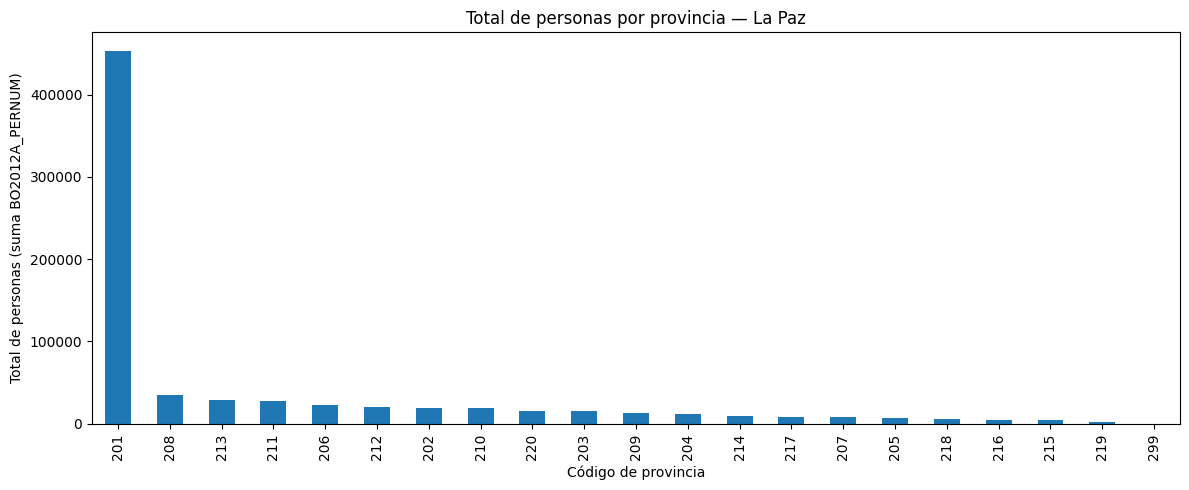

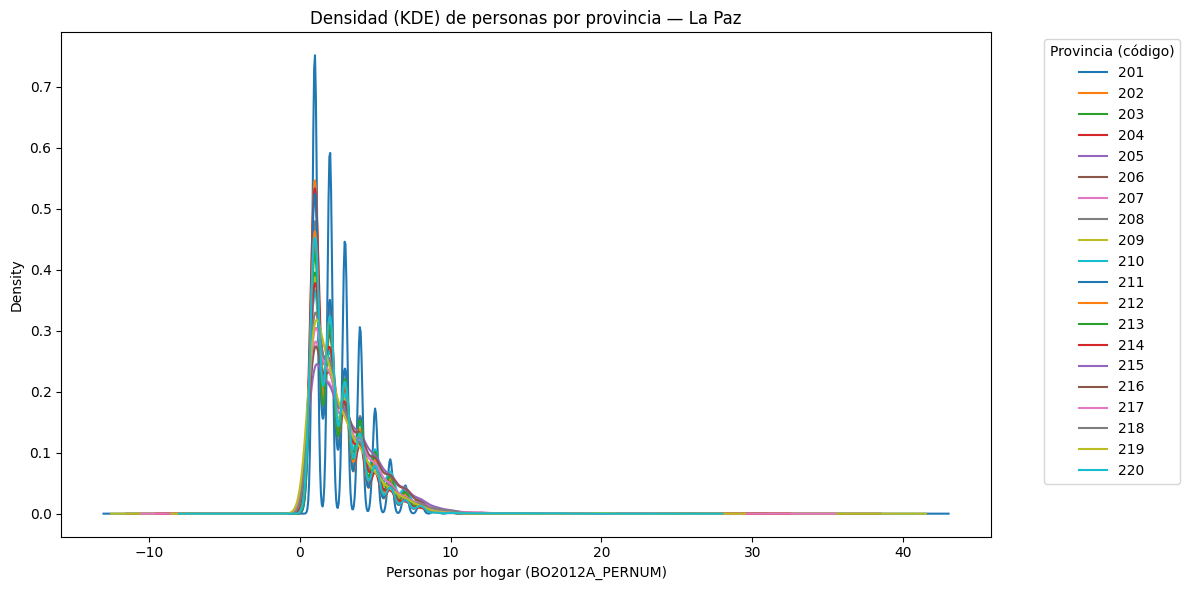

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15616\3170689253.py:148: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=True)


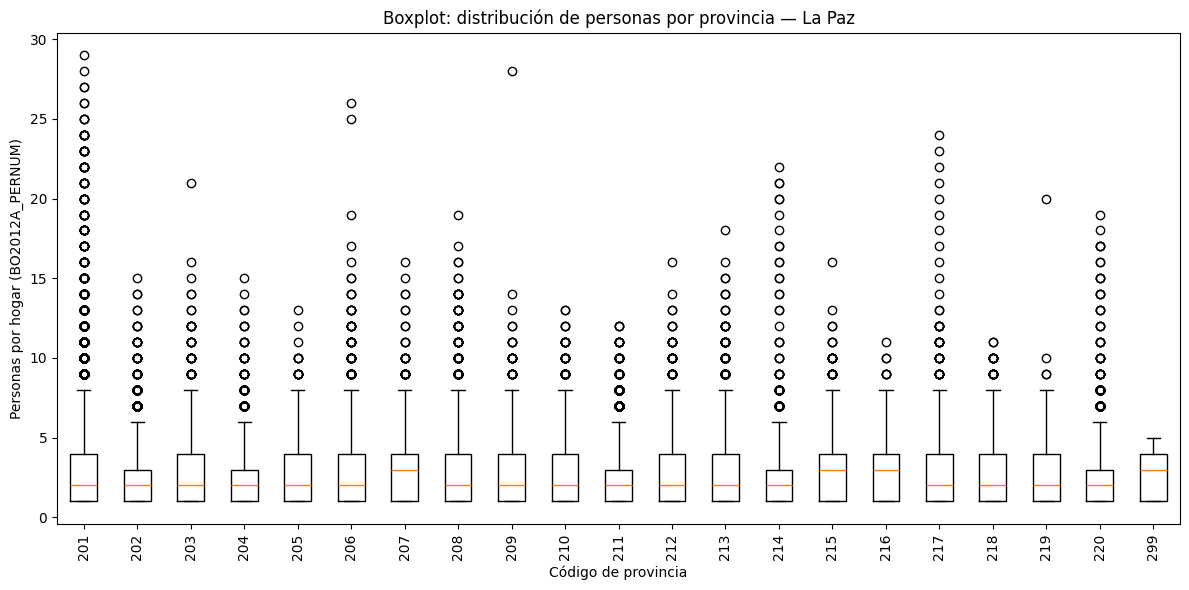


== Santa Cruz (código 7) — filas: 264525 ==
Resumen guardado en: figuras_provincias\Santa Cruz_resumen_provincias.csv


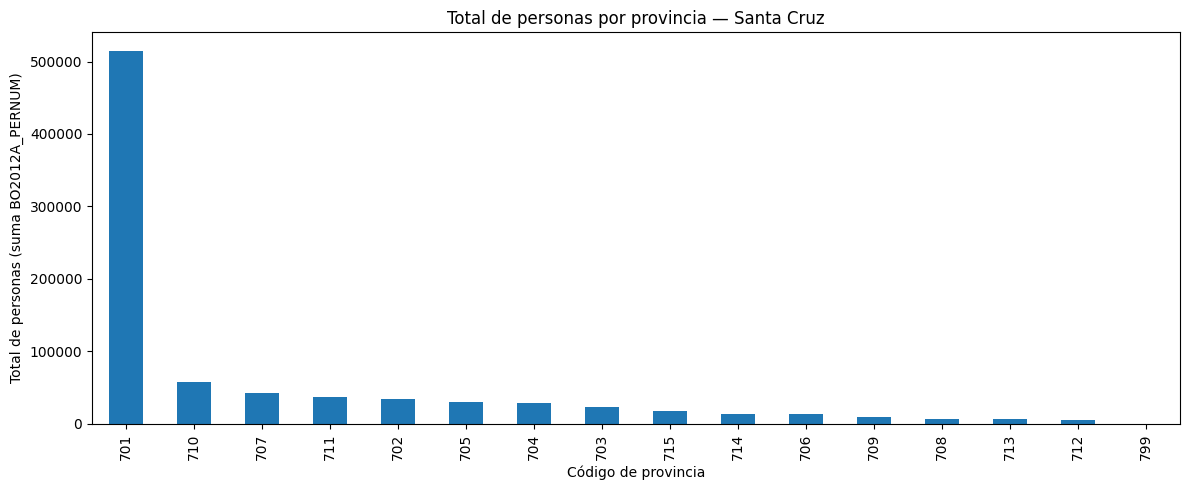

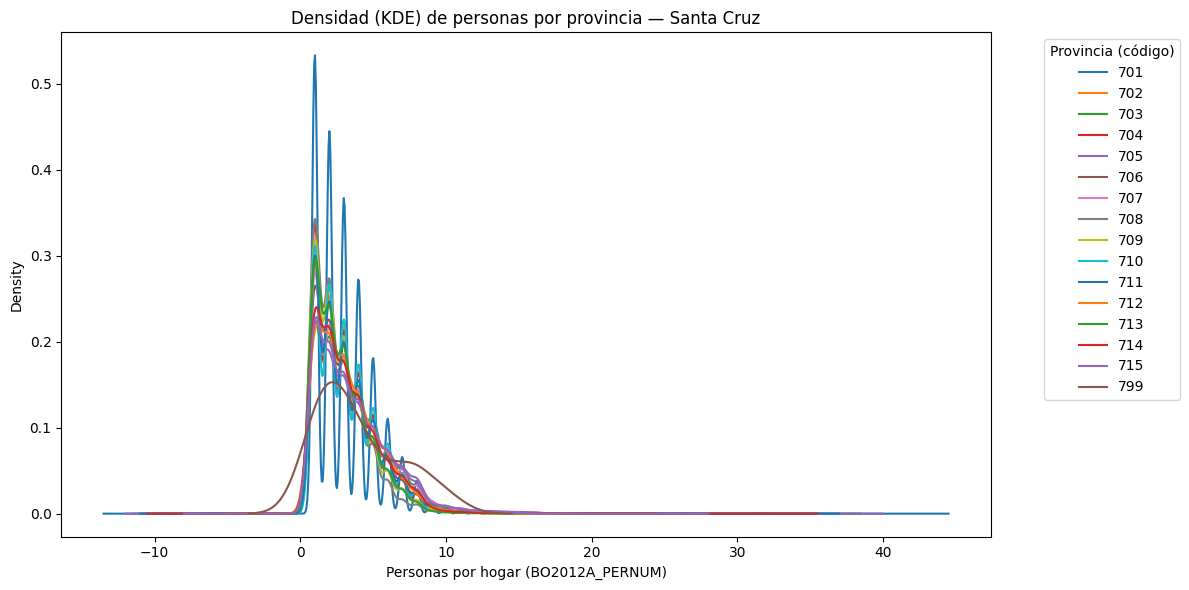

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15616\3170689253.py:148: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=True)


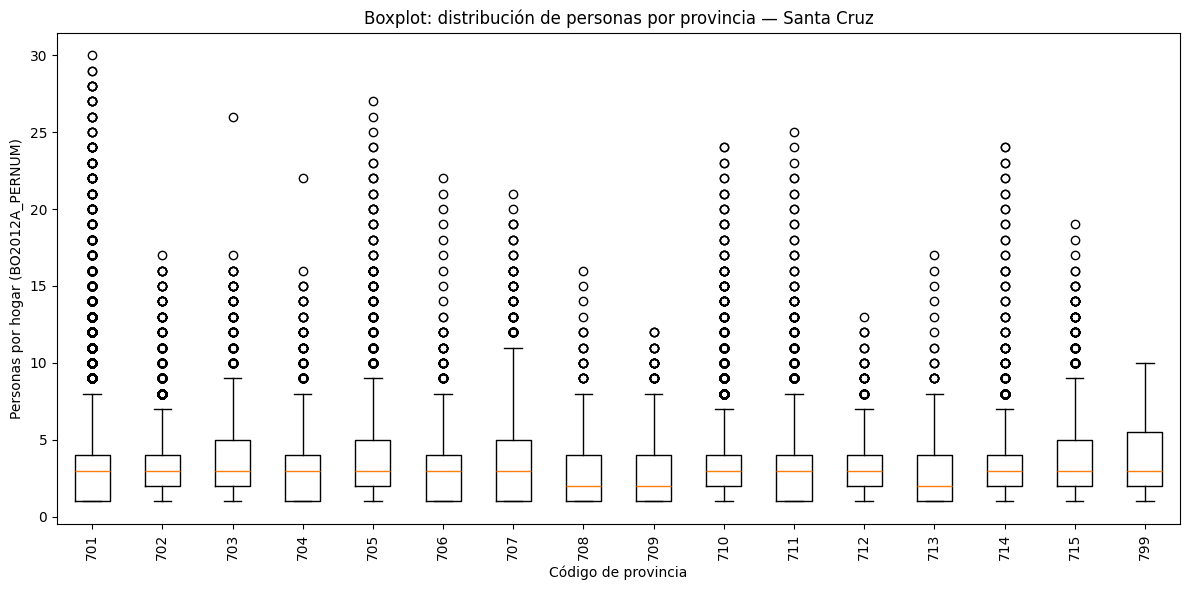


== Cochabamba (código 3) — filas: 175720 ==
Resumen guardado en: figuras_provincias\Cochabamba_resumen_provincias.csv


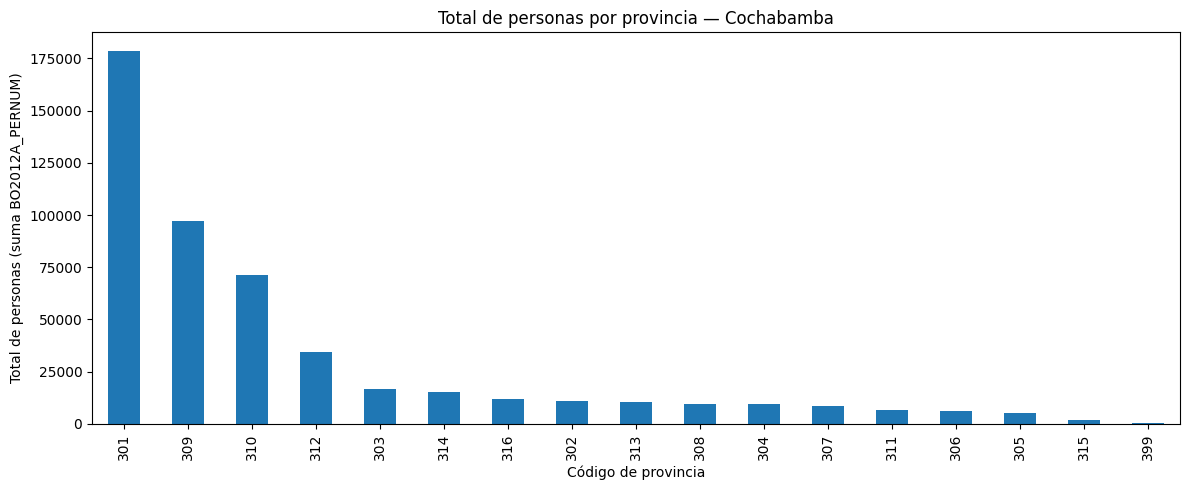

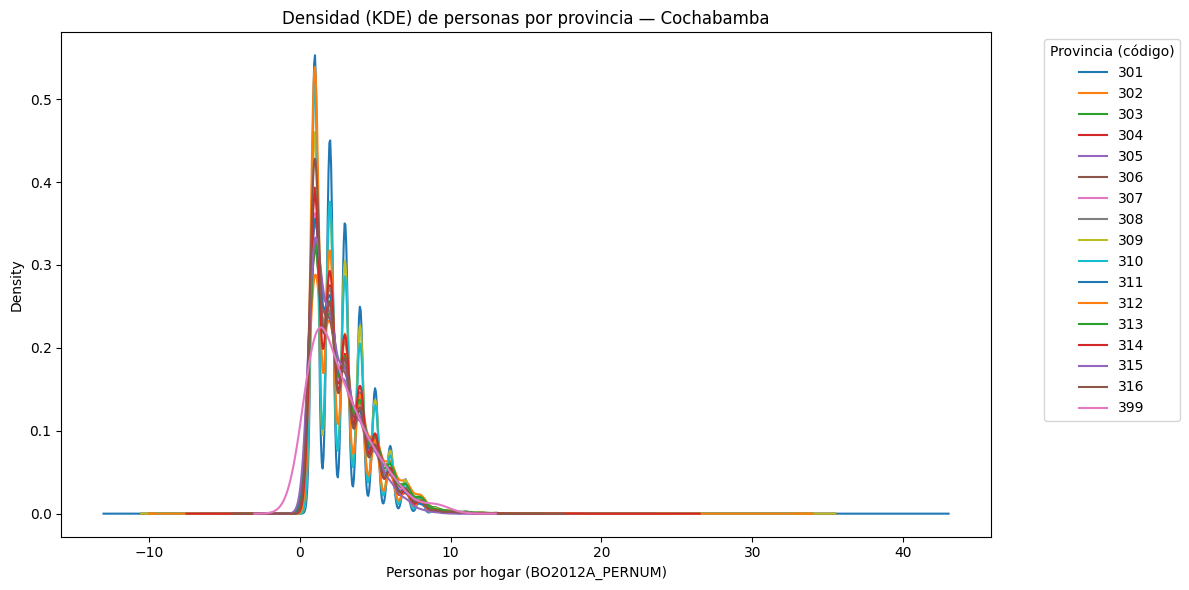

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15616\3170689253.py:148: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=True)


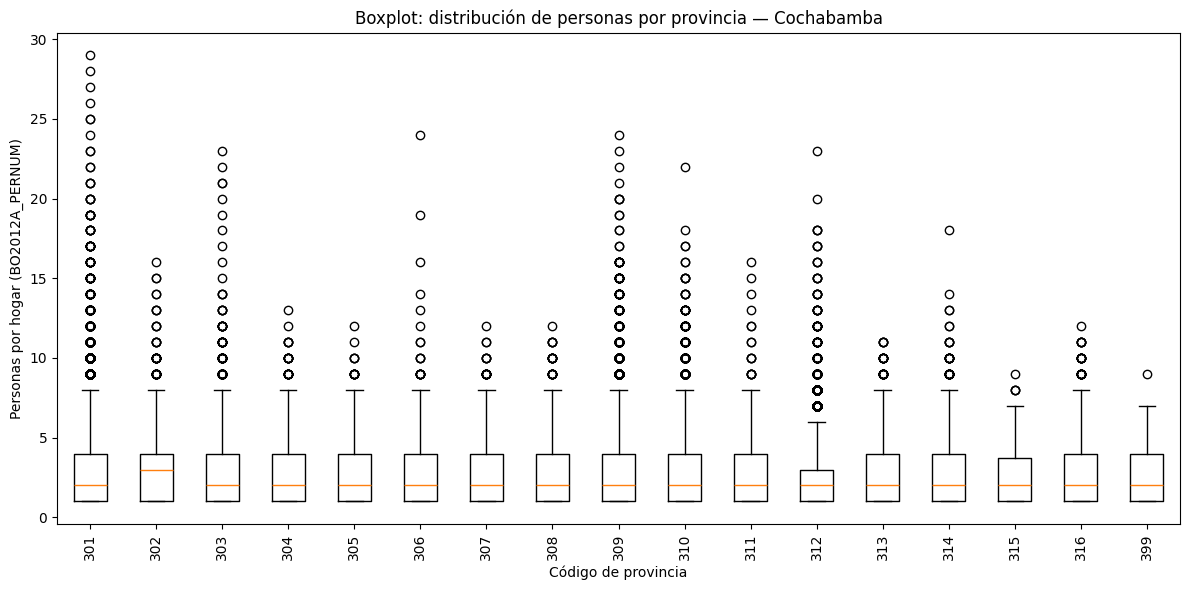


== Potosi (código 5) — filas: 81916 ==
Resumen guardado en: figuras_provincias\Potosi_resumen_provincias.csv


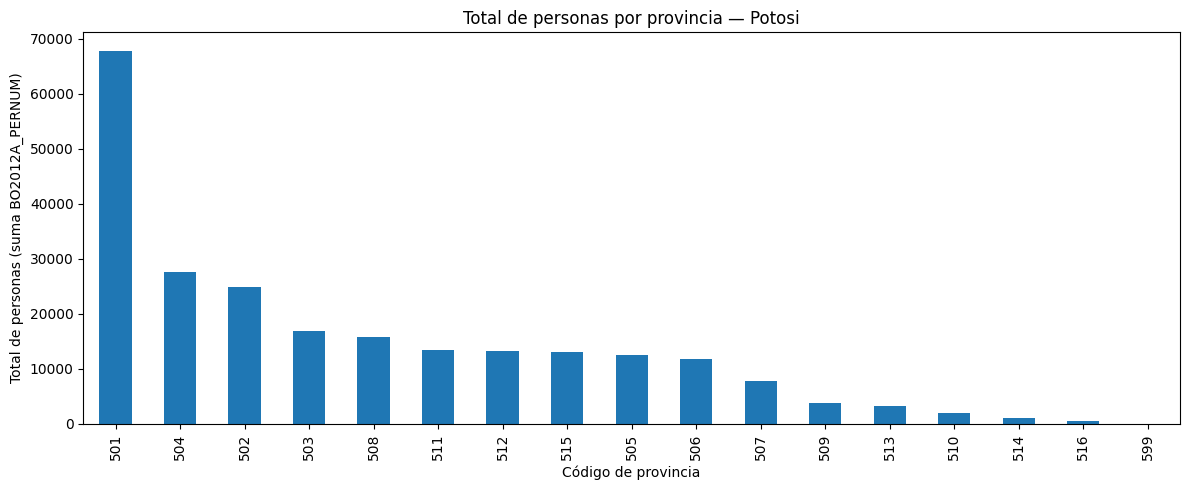

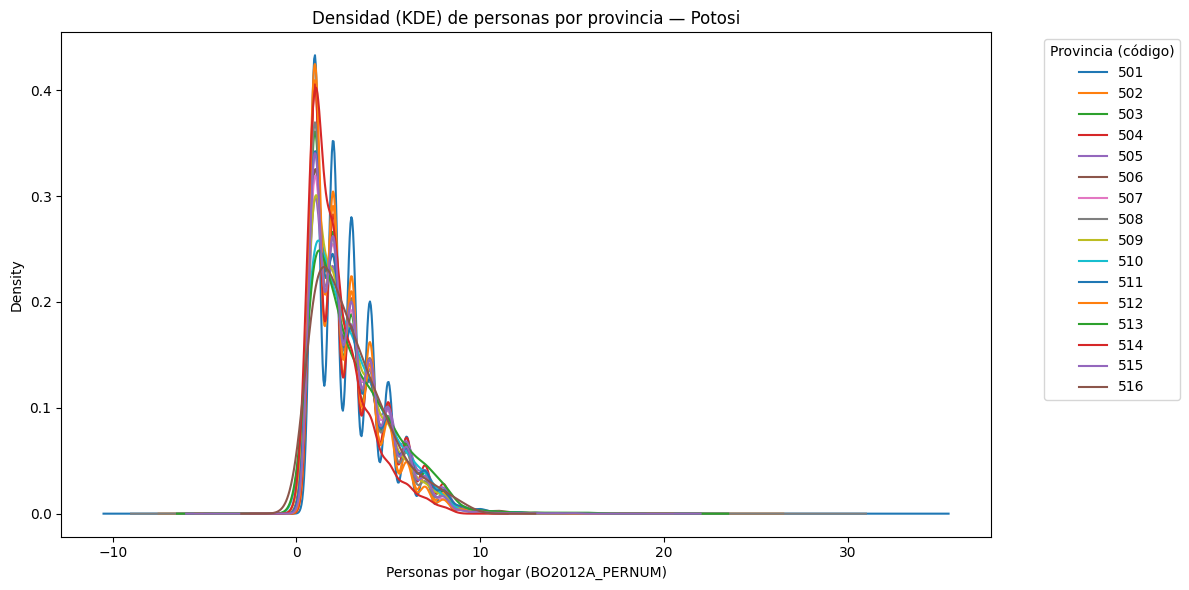

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15616\3170689253.py:148: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=True)


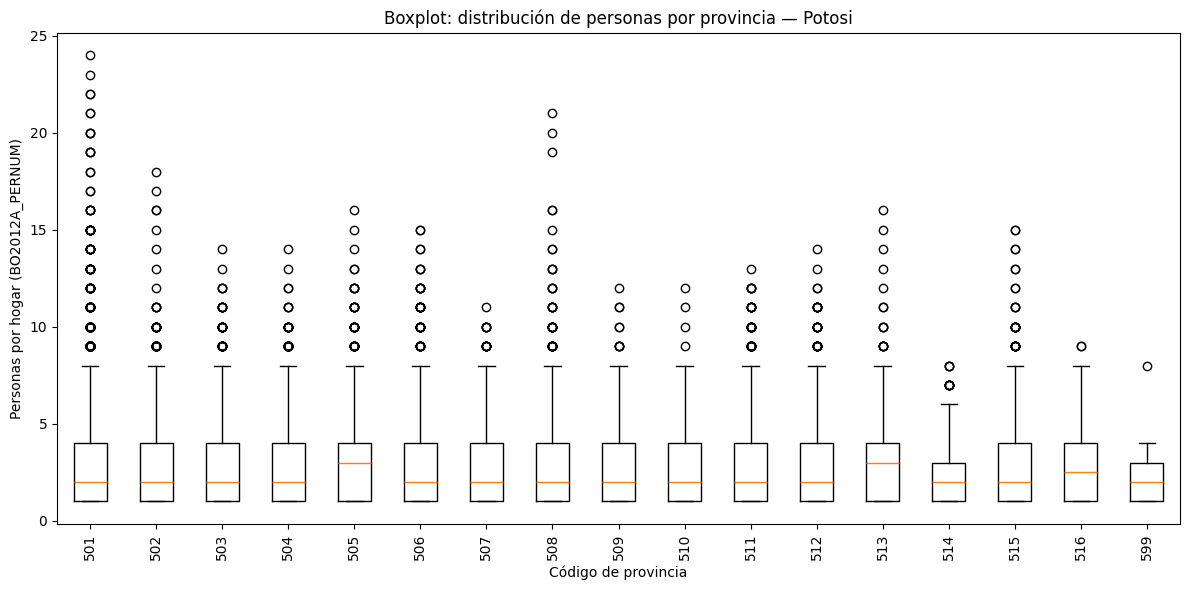


== Sucre (código 1) — filas: 57648 ==
Resumen guardado en: figuras_provincias\Sucre_resumen_provincias.csv


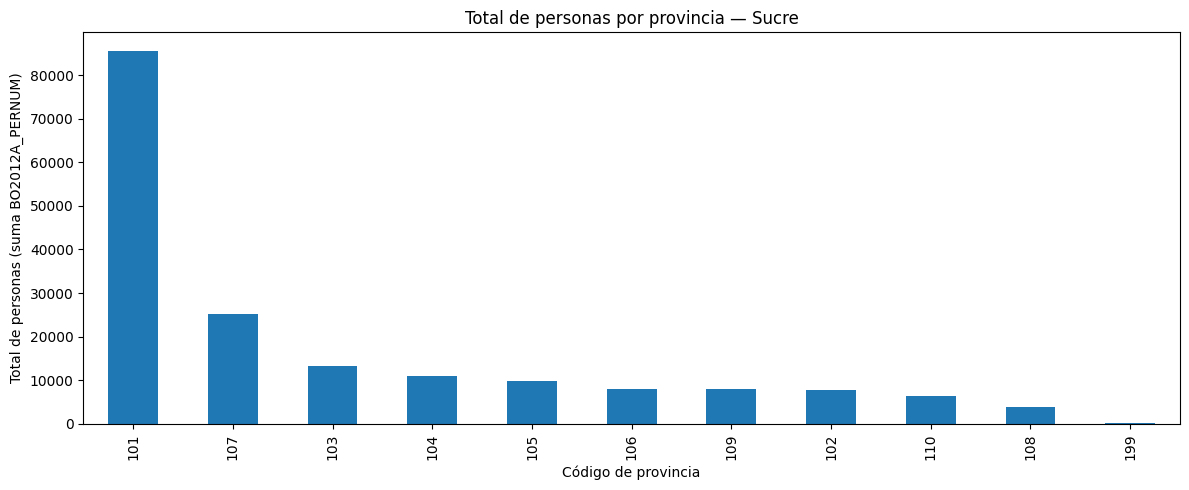

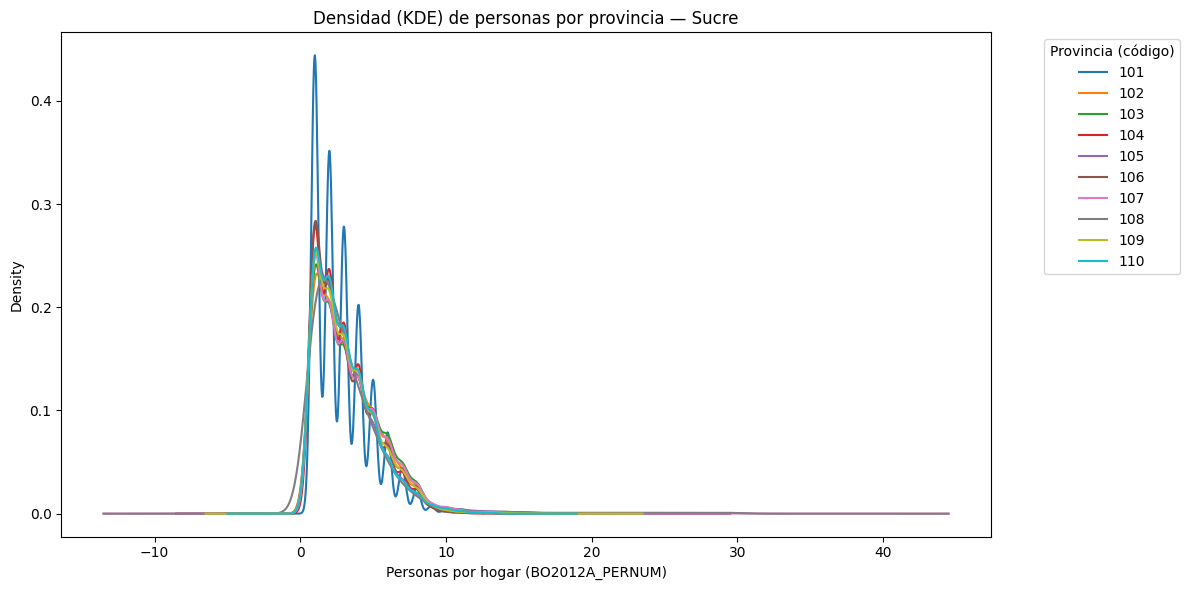

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15616\3170689253.py:148: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=True)


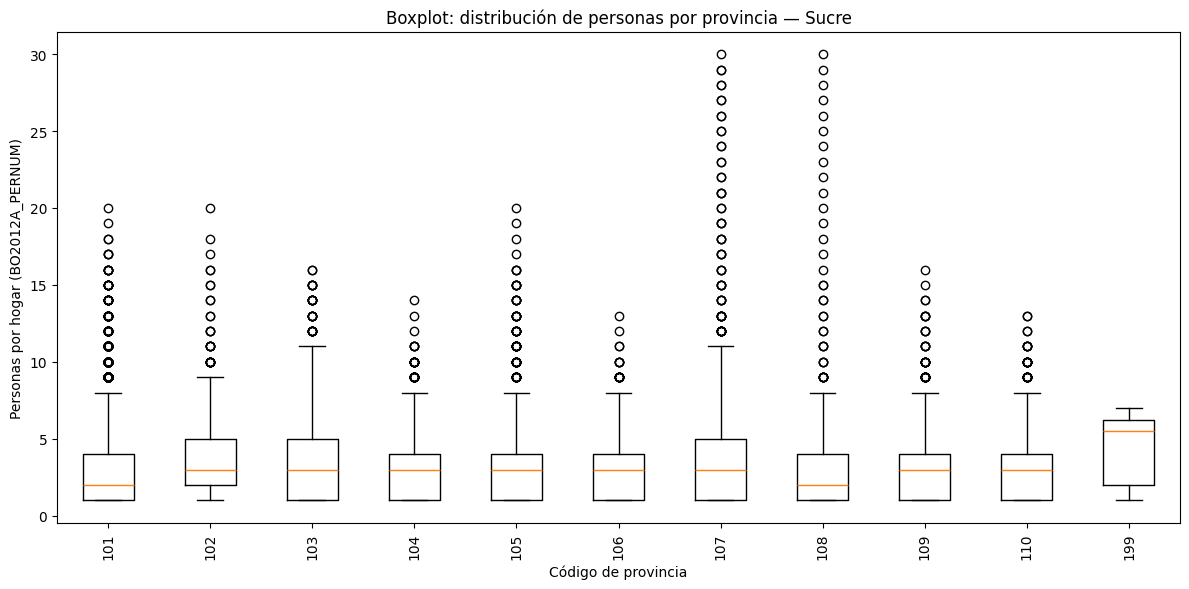


== Oruro (código 4) — filas: 49021 ==
Resumen guardado en: figuras_provincias\Oruro_resumen_provincias.csv


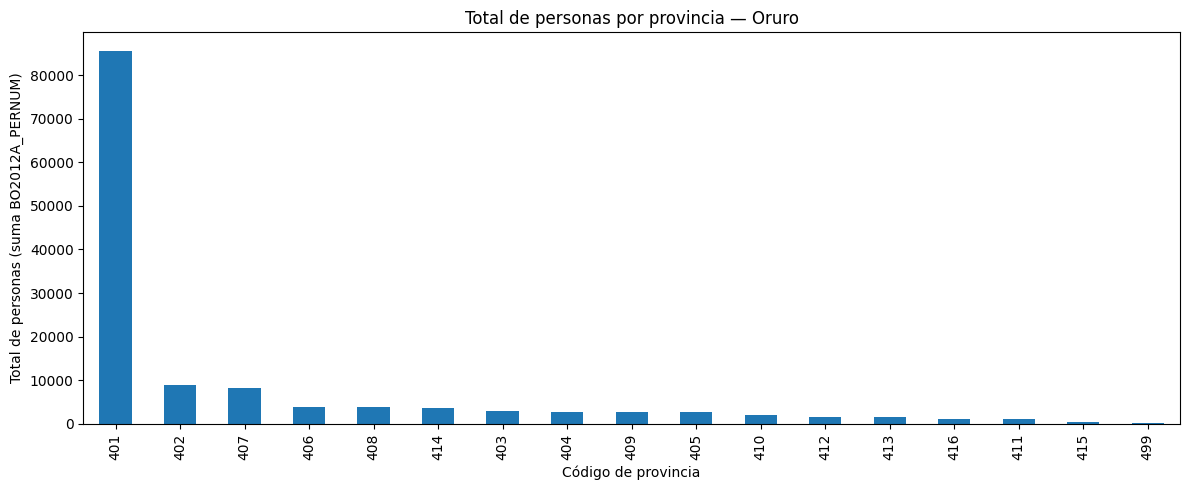

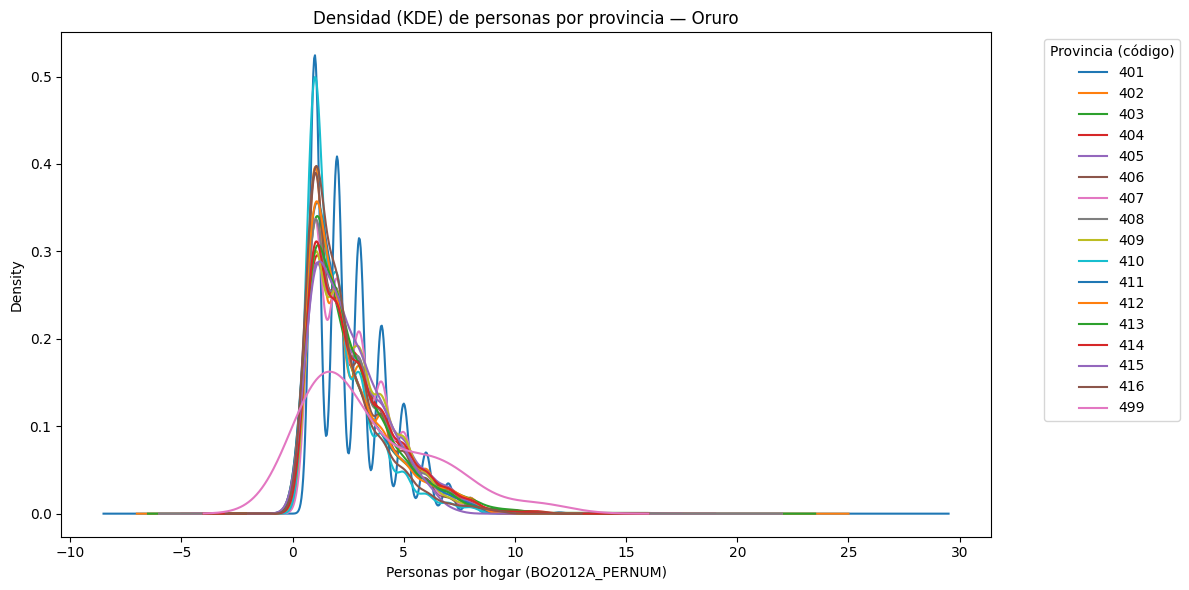

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15616\3170689253.py:148: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=True)


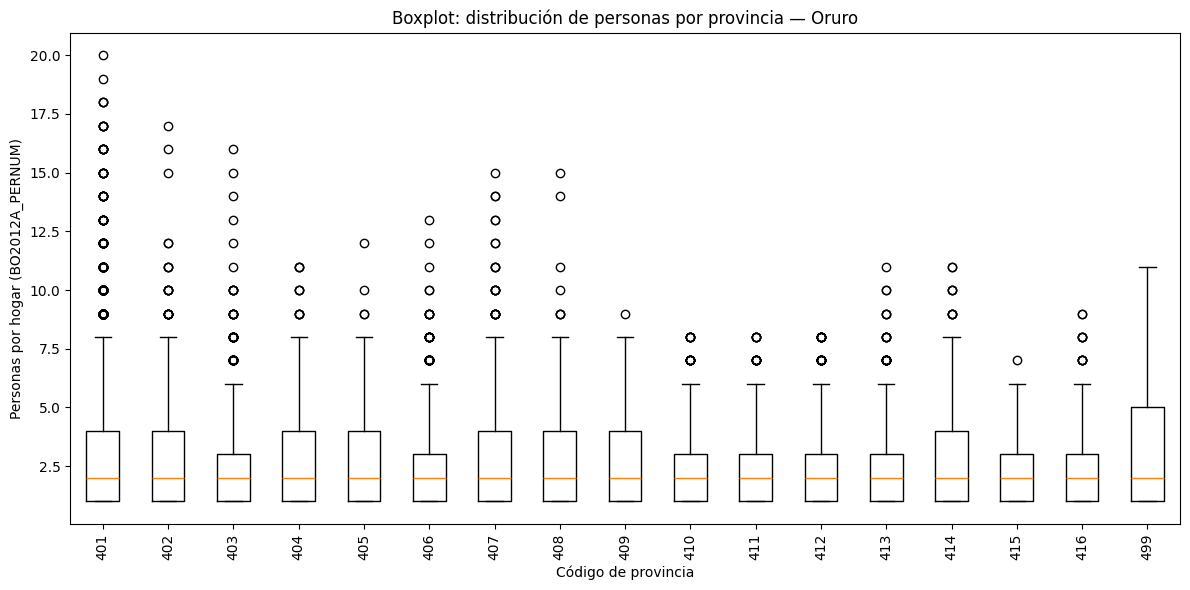


== El Alto (código 6) — filas: 48441 ==
Resumen guardado en: figuras_provincias\El Alto_resumen_provincias.csv


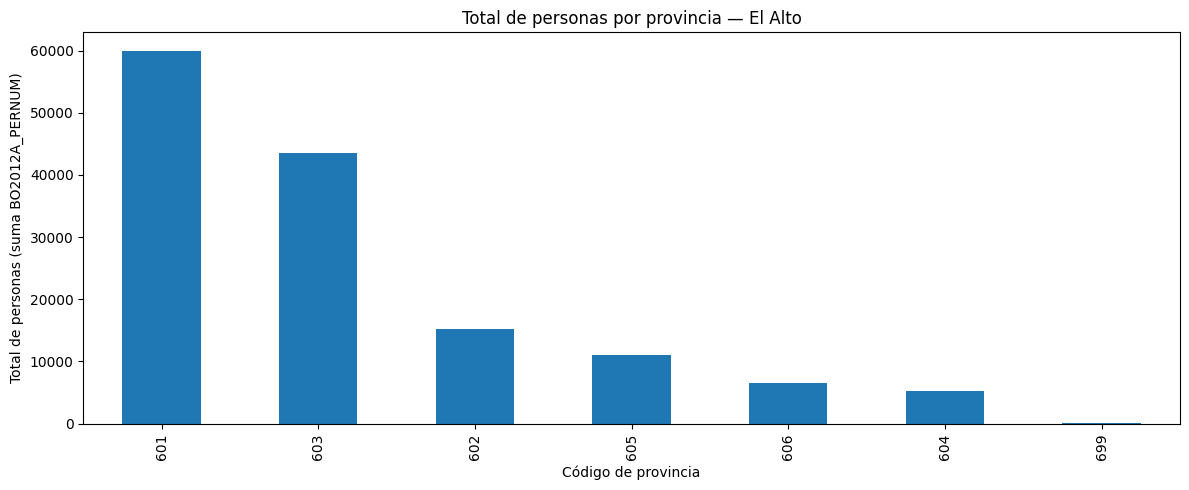

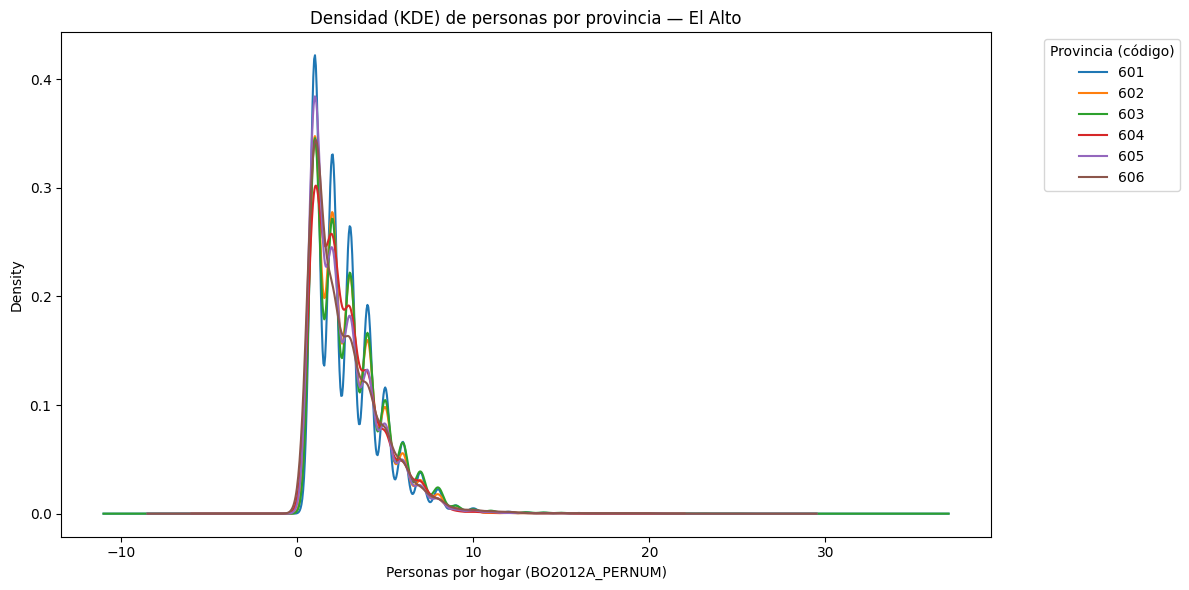

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15616\3170689253.py:148: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=True)


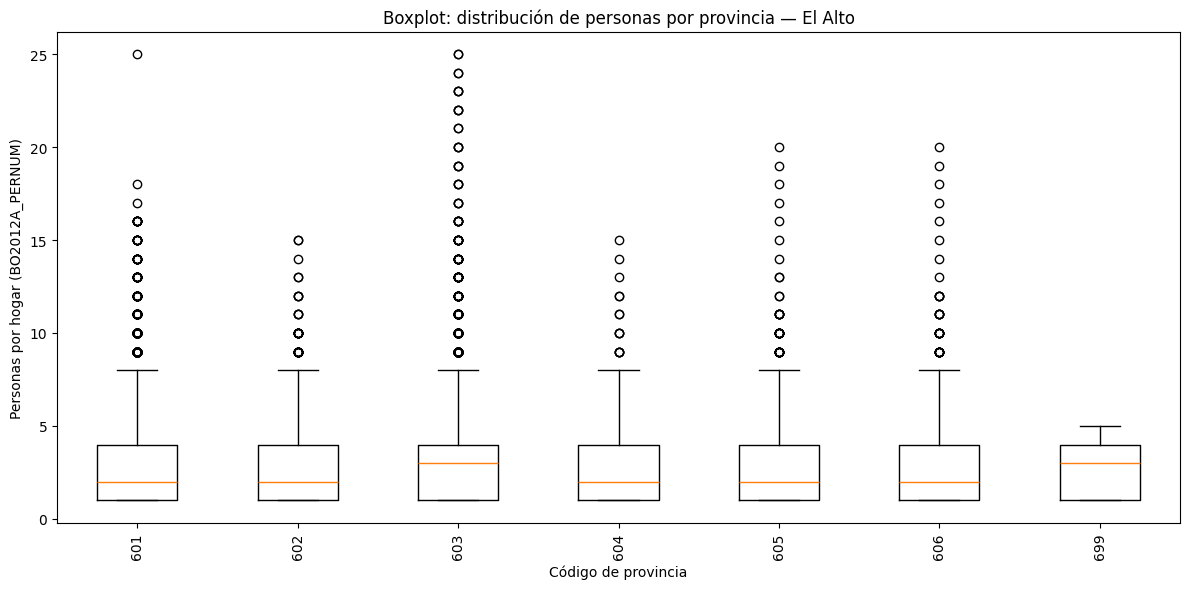


== Tarija (código 8) — filas: 42117 ==
Resumen guardado en: figuras_provincias\Tarija_resumen_provincias.csv


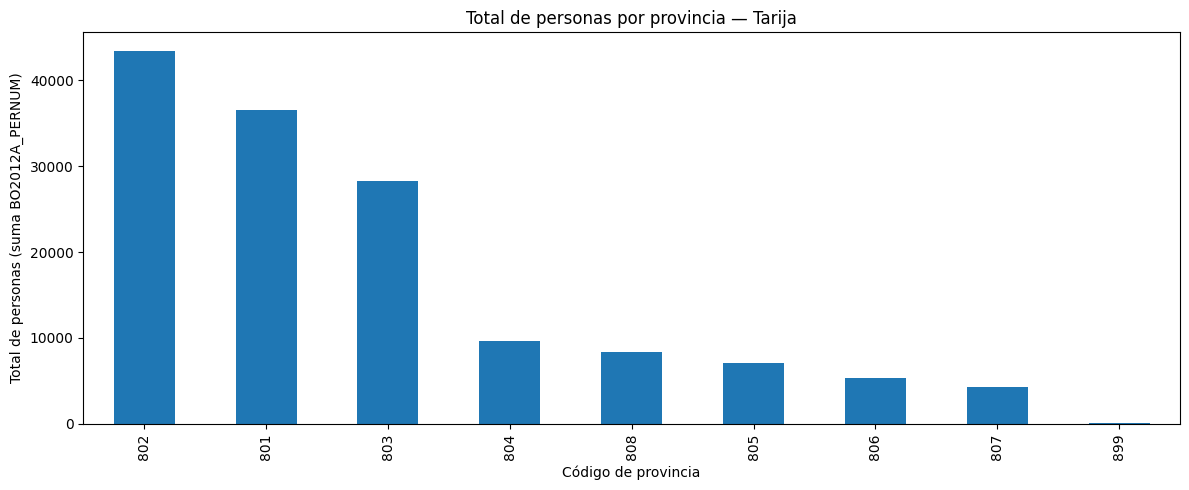

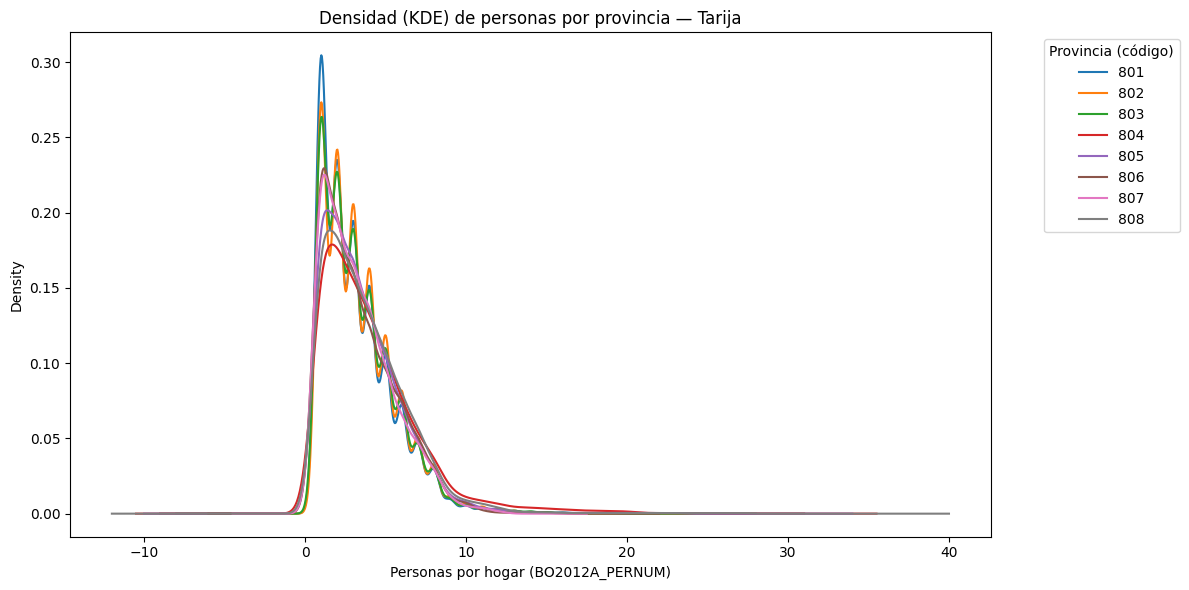

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15616\3170689253.py:148: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=True)


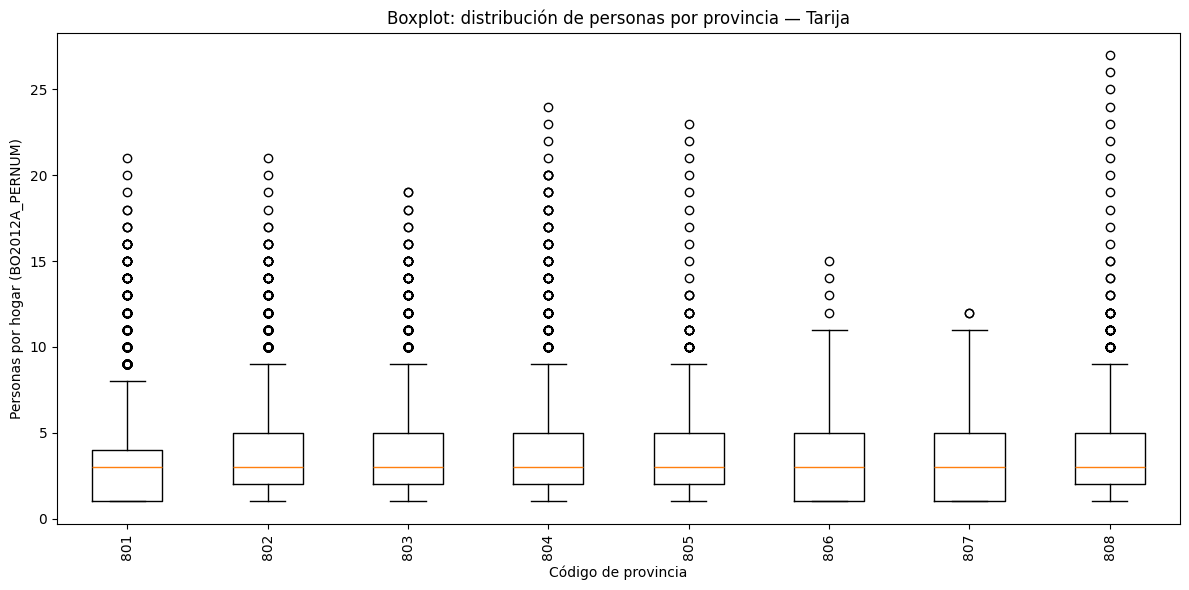


== Beni (código 9) — filas: 10977 ==
Resumen guardado en: figuras_provincias\Beni_resumen_provincias.csv


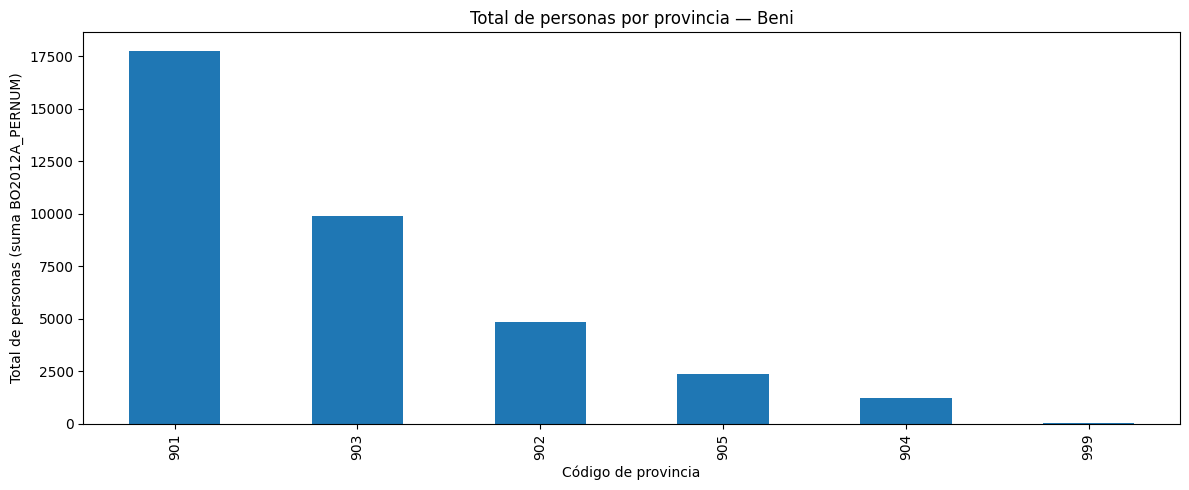

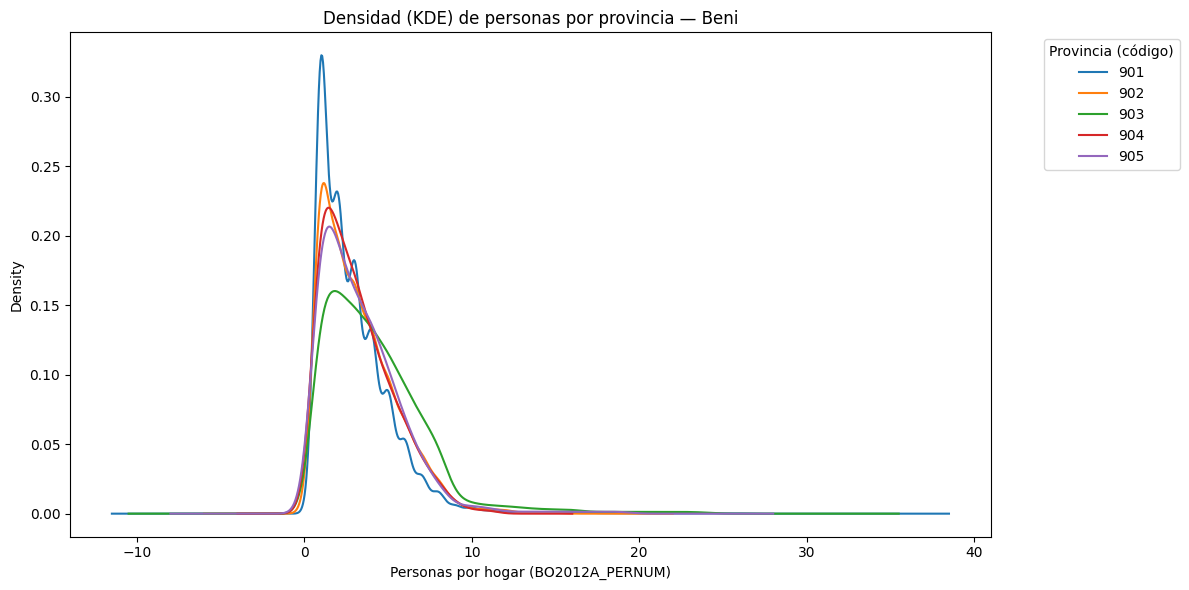

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15616\3170689253.py:148: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=True)


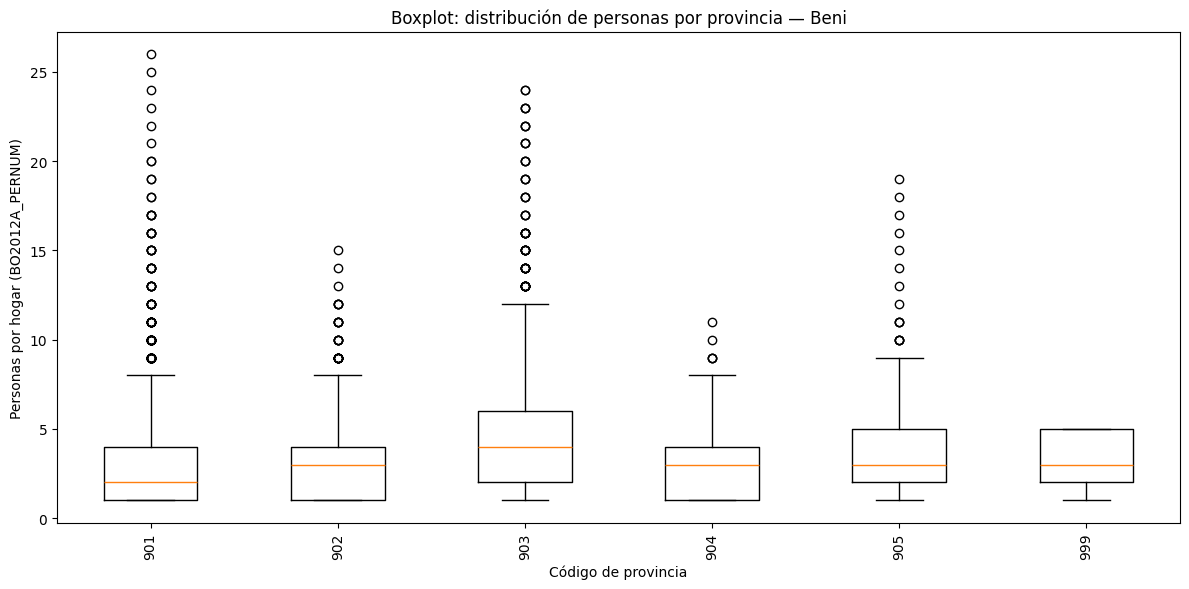

Pando: no hay datos para este departamento.

Resumen global guardado en: figuras_provincias\resumen_todos_los_departamentos.csv
Proceso finalizado. Imágenes y CSVs en la carpeta: figuras_provincias


In [27]:
# Lectura robusta + procesamiento + gráficas por departamento
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

csv_path = 'ipumsi_2012.csv'   # ajusta si corresponde
out_dir = 'figuras_provincias'
os.makedirs(out_dir, exist_ok=True)

print("pandas version:", pd.__version__)

def read_csv_robusto(path):
    # Intento 1: usar encoding_errors (pandas relativamente moderno)
    try:
        print("Intento: pd.read_csv(..., encoding='utf-8', encoding_errors='replace')")
        df = pd.read_csv(path, dtype=str, low_memory=False, encoding='utf-8', encoding_errors='replace')
        print("Lectura exitosa con encoding_errors.")
        return df
    except TypeError:
        print("Tu versión de pandas no soporta encoding_errors. Usaré open(..., errors='replace').")
    except Exception as e:
        print("Error en intento con encoding_errors:", repr(e))

    # Intento 2: abrir el archivo con open(..., errors='replace') y pasar el file-handle a pandas
    try:
        print("Intento: abrir archivo con open(..., errors='replace') y pd.read_csv(filehandle)")
        with open(path, 'r', encoding='utf-8', errors='replace') as f:
            df = pd.read_csv(f, dtype=str, low_memory=False)
        print("Lectura exitosa usando open(..., errors='replace') con utf-8.")
        return df
    except Exception as e:
        print("Falló lectura con open utf-8:", repr(e))

    # Intento 3: fallback a latin1
    try:
        print("Intento fallback: pd.read_csv(..., encoding='latin1')")
        df = pd.read_csv(path, dtype=str, low_memory=False, encoding='latin1')
        print("Lectura exitosa con latin1.")
        return df
    except Exception as e:
        print("Falló lectura con latin1:", repr(e))
        raise RuntimeError("No se pudo leer el archivo con las estrategias probadas. Revisa la ruta/permiso/encoding.") from e

# ----------------- Lectura -----------------
df = read_csv_robusto(csv_path)

# Normalizar columnas y mostrar resumen
df.columns = [c.strip() for c in df.columns]
print("Shape:", df.shape)
print("Primeras columnas:", df.columns.tolist()[:20])

# Opcional: mostrar todas las filas de value_counts
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# ----------------- Conversión de columnas relevantes -----------------
df['BO2012A_RESDEPT'] = pd.to_numeric(df.get('BO2012A_RESDEPT'), errors='coerce').astype('Int64')
df['BO2012A_RESPROV'] = pd.to_numeric(df.get('BO2012A_RESPROV'), errors='coerce').astype('Int64')
df['BO2012A_PERNUM'] = pd.to_numeric(df.get('BO2012A_PERNUM'), errors='coerce').astype('Int64')

print("\nMuestra de las columnas relevantes:")
display(df[['BO2012A_RESDEPT','BO2012A_RESPROV','BO2012A_PERNUM']].head(10))

# Si quieres ver todos los valores distintos de provincias:
print("\nConteo completo de provincias (BO2012A_RESPROV):")
print(df['BO2012A_RESPROV'].value_counts(dropna=False).sort_index().to_string())

# ----------------- Mapa deptos (usa tus códigos) -----------------
dept_map = {
    2: 'La Paz',
    7: 'Santa Cruz',
    3: 'Cochabamba',
    5: 'Potosi',
    1: 'Sucre',
    4: 'Oruro',
    6: 'El Alto',
    8: 'Tarija',
    9: 'Beni',
    10: 'Pando'
}

df['dept_name'] = df['BO2012A_RESDEPT'].map(dept_map).fillna('Unknown')
df['prov_code'] = df['BO2012A_RESPROV']  # código de provincia tal cual

# ----------------- Funciones de resumen y graficado (las mismas de antes) --------------
def resumen_por_depto(df_dept):
    g = df_dept.groupby('prov_code')['BO2012A_PERNUM'].agg(
        total_personas=lambda s: s.sum(min_count=1),
        hogares=lambda s: s.count(),
        media_personas=lambda s: s.mean()
    ).sort_values('total_personas', ascending=False)
    return g

def plot_total_persons_bar(series_totals, dept_name):
    plt.figure(figsize=(12,5))
    series_totals.plot(kind='bar')
    plt.title(f'Total de personas por provincia — {dept_name}')
    plt.xlabel('Código de provincia')
    plt.ylabel('Total de personas (suma BO2012A_PERNUM)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    fn = os.path.join(out_dir, f'{dept_name}_total_persons_by_province.png')
    plt.savefig(fn, dpi=150)
    plt.show()
    plt.close()

def plot_kde_by_province(df_dept, dept_name, min_obs=20):
    plt.figure(figsize=(12,6))
    plotted = 0
    for prov, g in df_dept.groupby('prov_code'):
        s = g['BO2012A_PERNUM'].dropna().astype(float)
        if len(s) >= min_obs and s.nunique() > 1:
            try:
                s.plot(kind='kde', label=str(int(prov)))
                plotted += 1
            except Exception:
                pass
    if plotted == 0:
        plt.figure(figsize=(12,6))
        for prov, g in df_dept.groupby('prov_code'):
            s = g['BO2012A_PERNUM'].dropna().astype(float)
            if len(s) > 0:
                plt.hist(s, alpha=0.4, bins=range(1, max(31, int(s.max())+2)), label=str(int(prov)))
        plt.xlabel('Personas por hogar (BO2012A_PERNUM)')
        plt.ylabel('Frecuencia (histograma)')
    plt.title(f'Densidad (KDE) de personas por provincia — {dept_name}')
    plt.xlabel('Personas por hogar (BO2012A_PERNUM)')
    plt.legend(title='Provincia (código)', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    fn = os.path.join(out_dir, f'{dept_name}_kde_persons_by_province.png')
    plt.savefig(fn, dpi=150, bbox_inches='tight')
    plt.show()
    plt.close()

def plot_boxplot_by_province(df_dept, dept_name, min_obs=5):
    data = []
    labels = []
    for prov, g in df_dept.groupby('prov_code'):
        s = g['BO2012A_PERNUM'].dropna().astype(float)
        if len(s) >= min_obs:
            data.append(s.values)
            labels.append(str(int(prov)))
    if len(data) == 0:
        print(f"No hay provincias con al menos {min_obs} observaciones en {dept_name} para boxplot.")
        return
    plt.figure(figsize=(12,6))
    plt.boxplot(data, labels=labels, showfliers=True)
    plt.title(f'Boxplot: distribución de personas por provincia — {dept_name}')
    plt.xlabel('Código de provincia')
    plt.ylabel('Personas por hogar (BO2012A_PERNUM)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    fn = os.path.join(out_dir, f'{dept_name}_boxplot_persons_by_province.png')
    plt.savefig(fn, dpi=150)
    plt.show()
    plt.close()

# ----------------- Loop por departamento: resumen y graficas ------------
summary_all = []
for dept_code, dept_name in dept_map.items():
    df_dept = df[df['BO2012A_RESDEPT'] == dept_code].copy()
    if df_dept.empty:
        print(f"{dept_name}: no hay datos para este departamento.")
        continue

    df_dept = df_dept[df_dept['BO2012A_PERNUM'].notna()]

    print(f"\n== {dept_name} (código {dept_code}) — filas: {len(df_dept)} ==")
    resumen = resumen_por_depto(df_dept)
    if resumen.empty:
        print("No hay datos agregables por provincia.")
        continue

    resumen_file = os.path.join(out_dir, f'{dept_name}_resumen_provincias.csv')
    resumen.to_csv(resumen_file, index=True)
    print("Resumen guardado en:", resumen_file)

    tmp = resumen.reset_index().rename(columns={'prov_code':'province_code'})
    tmp['dept_code'] = dept_code
    tmp['dept_name'] = dept_name
    summary_all.append(tmp)

    plot_total_persons_bar(resumen['total_personas'], dept_name)
    plot_kde_by_province(df_dept, dept_name, min_obs=20)
    plot_boxplot_by_province(df_dept, dept_name, min_obs=5)

if summary_all:
    all_summary = pd.concat(summary_all, ignore_index=True)
    all_summary.to_csv(os.path.join(out_dir, 'resumen_todos_los_departamentos.csv'), index=False)
    print("\nResumen global guardado en:", os.path.join(out_dir, 'resumen_todos_los_departamentos.csv'))
else:
    print("No se generó resumen global (summary_all vacío).")

print("Proceso finalizado. Imágenes y CSVs en la carpeta:", out_dir)
